## credit card default prediction
### This repo is about predicting which user will cause credit card default based on their behavior using KNN, Decision tree, and Neural network

In [1]:
import sklearn
import sklearn.model_selection
import sklearn.metrics
import pandas
df=pandas.read_csv("creditCardDefaultReduced.csv")

In [2]:
import numpy
numpy.random.seed( 30 )

In [3]:
df

,Limit_Bal,Education,Marriage,Age,Pay_0,Bill_Amt1,Pay_Amt1,Payment,Card
0,20000,University,married,24,Delay2,3913,0,Missed,Normal
1,120000,University,single,26,ontime,2682,0,Missed,Normal
2,90000,University,single,34,Delay0,29239,1518,Paid,Normal
3,50000,University,married,37,Delay0,46990,2000,Paid,Normal
4,50000,University,married,57,ontime,8617,2000,Paid,Gold
...,...,...,...,...,...,...,...,...,...
29995,220000,High school,married,39,Delay0,188948,8500,Paid,Gold
29996,150000,High school,single,43,ontime,1683,1837,Paid,Gold
29997,30000,University,single,37,Delay4,3565,0,Missed,Gold
29998,80000,High school,married,41,Delay1,-1645,85900,Missed,Gold


In [4]:
df.dtypes

Limit_Bal     int64
Education    object
Marriage     object
Age           int64
Pay_0        object
Bill_Amt1     int64
Pay_Amt1      int64
Payment      object
Card         object
dtype: object

In [5]:
# summary stats
df.describe()

,Limit_Bal,Age,Bill_Amt1,Pay_Amt1
count,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,35.485500,51223.330900,5663.580500
std,129747.661567,9.217904,73635.860576,16563.280354
min,10000.000000,21.000000,-165580.000000,0.000000
25%,50000.000000,28.000000,3558.750000,1000.000000
50%,140000.000000,34.000000,22381.500000,2100.000000
75%,240000.000000,41.000000,67091.000000,5006.000000
max,1000000.000000,79.000000,964511.000000,873552.000000


In [6]:
# run a classification model on "Payment" - to predict who is likely to default on a loan
outcome = df['Payment']

In [7]:
#normalize predictors
numericFeatures = df[ [ 'Limit_Bal', 'Bill_Amt1', 'Pay_Amt1', 'Age' ]] 
numericFeatures = numericFeatures / numpy.linalg.norm(numericFeatures, axis=0)
numericFeatures

,Limit_Bal,Bill_Amt1,Pay_Amt1,Age
0,0.000545,0.000252,0.000000,0.003779
1,0.003270,0.000173,0.000000,0.004094
2,0.002453,0.001882,0.000501,0.005354
3,0.001363,0.003025,0.000660,0.005827
4,0.001363,0.000555,0.000660,0.008976
...,...,...,...,...
29995,0.005995,0.012162,0.002804,0.006141
29996,0.004088,0.000108,0.000606,0.006771
29997,0.000818,0.000229,0.000000,0.005827
29998,0.002180,-0.000106,0.028332,0.006456


In [8]:
# Dummy variable 
dummiesPay_0 = pandas.get_dummies( df['Pay_0'], prefix="Pay_0", drop_first=True)

In [9]:
dummiesPay_0

,Pay_0_Delay1,Pay_0_Delay2,Pay_0_Delay3,Pay_0_Delay4,Pay_0_Delay5,Pay_0_Delay6,Pay_0_Delay7,Pay_0_Delay8+,Pay_0_ontime,Pay_0_unknown
0,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
29995,0,0,0,0,0,0,0,0,0,0
29996,0,0,0,0,0,0,0,0,1,0
29997,0,0,0,1,0,0,0,0,0,0
29998,1,0,0,0,0,0,0,0,0,0


In [10]:
# combine dataframes
features = pandas.concat( [ numericFeatures, dummiesPay_0], axis=1 )
features

,Limit_Bal,Bill_Amt1,Pay_Amt1,Age,Pay_0_Delay1,Pay_0_Delay2,Pay_0_Delay3,Pay_0_Delay4,Pay_0_Delay5,Pay_0_Delay6,Pay_0_Delay7,Pay_0_Delay8+,Pay_0_ontime,Pay_0_unknown
0,0.000545,0.000252,0.000000,0.003779,0,1,0,0,0,0,0,0,0,0
1,0.003270,0.000173,0.000000,0.004094,0,0,0,0,0,0,0,0,1,0
2,0.002453,0.001882,0.000501,0.005354,0,0,0,0,0,0,0,0,0,0
3,0.001363,0.003025,0.000660,0.005827,0,0,0,0,0,0,0,0,0,0
4,0.001363,0.000555,0.000660,0.008976,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.005995,0.012162,0.002804,0.006141,0,0,0,0,0,0,0,0,0,0
29996,0.004088,0.000108,0.000606,0.006771,0,0,0,0,0,0,0,0,1,0
29997,0.000818,0.000229,0.000000,0.005827,0,0,0,1,0,0,0,0,0,0
29998,0.002180,-0.000106,0.028332,0.006456,1,0,0,0,0,0,0,0,0,0


In [11]:
# split dataset to 80/20
featuresTrain, featuresTest, outcomeTrain, outcomeTest = sklearn.model_selection.train_test_split(
features, outcome, test_size=0.20 )

### Knn


In [12]:
import sklearn.neighbors
modelKnn = sklearn.neighbors.KNeighborsClassifier(n_neighbors=3) # 3 neighbors

In [13]:
resultKnn = modelKnn.fit( featuresTrain, outcomeTrain ) # fits model
predKnnTest = modelKnn.predict(featuresTest) # tests model
cmKnnTest = sklearn.metrics.confusion_matrix( outcomeTest, predKnnTest )

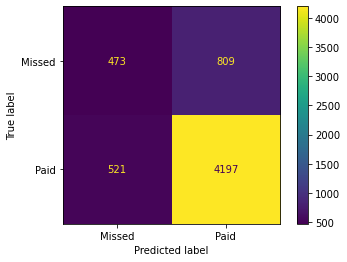

In [14]:
# confusion matrix
cmKnnTest = sklearn.metrics.confusion_matrix( outcomeTest, predKnnTest )
# print( cmKnnTest )
conf_matrix_knn = sklearn.metrics.ConfusionMatrixDisplay( cmKnnTest, display_labels=modelKnn.classes_ ).plot()

In [15]:
sklearn.metrics.accuracy_score( outcomeTest, predKnnTest ) 

0.7783333333333333

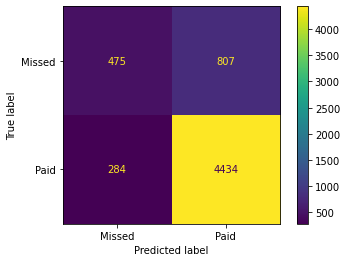

In [16]:
# Knn with n_neighbors =11
modelKnn = sklearn.neighbors.KNeighborsClassifier(n_neighbors=11)
resultKnn = modelKnn.fit( featuresTrain, outcomeTrain ) # fits model
predKnnTest = modelKnn.predict(featuresTest) # run fitted model on test set
cmKnnTest = sklearn.metrics.confusion_matrix( outcomeTest, predKnnTest ) 
conf_matrix_knn = sklearn.metrics.ConfusionMatrixDisplay( cmKnnTest, display_labels=modelKnn.classes_ ).plot()

In [17]:
sklearn.metrics.accuracy_score( outcomeTest, predKnnTest ) 
# much better this time 

0.8181666666666667

### Decision tree

In [18]:
import sklearn.tree
modelTree = sklearn.tree.DecisionTreeClassifier()

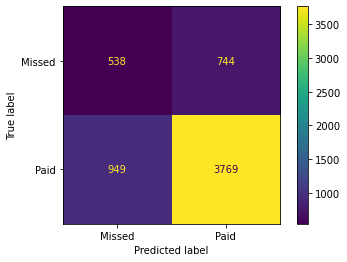

In [19]:
resultTree = modelTree.fit( featuresTrain, outcomeTrain )
# test set
predTreeTest = modelTree.predict( featuresTest )
# run confusion matrix
cmTreeTest = sklearn.metrics.confusion_matrix( outcomeTest, predTreeTest )
sklearn.metrics.ConfusionMatrixDisplay( cmTreeTest, display_labels=modelTree.classes_).plot()

In [20]:
sklearn.metrics.accuracy_score( outcomeTest, predTreeTest )
# worse. Let's try something else

0.7178333333333333

### neural network

In [21]:
import sklearn.neural_network
modelNeural = sklearn.neural_network.MLPClassifier( hidden_layer_sizes=(20,10) )
resultNeural = modelNeural.fit(featuresTrain, outcomeTrain)

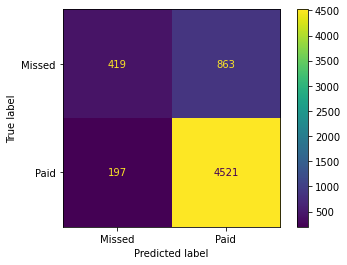

In [22]:
predNeuralTest = modelNeural.predict(featuresTest)
cmNeuralTest = sklearn.metrics.confusion_matrix( outcomeTest, predNeuralTest )
sklearn.metrics.ConfusionMatrixDisplay( cmNeuralTest, display_labels=modelNeural.classes_ ).plot()

sklearn.metrics.accuracy_score( outcomeTest,predNeuralTest)

### Try Naive Bayes 

In [23]:
# This assumes features independent - so might not be accurate

In [24]:
from sklearn.naive_bayes import GaussianNB
naive_classifier = GaussianNB()
modelNB = naive_classifier.fit(featuresTrain, outcomeTrain)

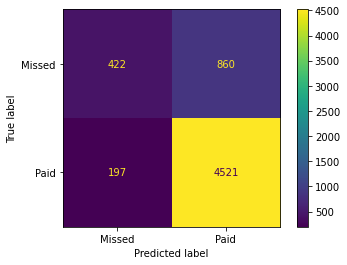

In [25]:
predNBTest = modelNB.predict(featuresTest)
cmNBTest = sklearn.metrics.confusion_matrix( outcomeTest, predNBTest )
sklearn.metrics.ConfusionMatrixDisplay( cmNBTest, display_labels=modelNB.classes_ ).plot()

In [26]:
sklearn.metrics.accuracy_score( outcomeTest, predNBTest )
# a little better this time

0.8238333333333333

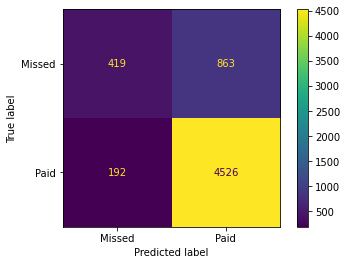

In [27]:
# random forest 
import sklearn.ensemble
Forest = sklearn.ensemble.RandomForestClassifier(n_estimators = 1000, max_depth = 10)
modelForest = Forest.fit(featuresTrain, outcomeTrain)
predForestTest = modelForest.predict(featuresTest)
cmForestTest = sklearn.metrics.confusion_matrix( outcomeTest, predForestTest )
sklearn.metrics.ConfusionMatrixDisplay( cmForestTest, display_labels=modelForest.classes_ ).plot()

In [28]:
sklearn.metrics.accuracy_score( outcomeTest, predForestTest )
# almost the same

0.8241666666666667